<a href="https://colab.research.google.com/github/samidardar/la-strategie-de-promotion-optimal-/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
pip install kaggle

In [ ]:
import kagglehub

# Download latest version
df = kagglehub.dataset_download("pratyushakar/rossmann-store-sales")

print("Path to dataset files:", df)

Using Colab cache for faster access to the 'rossmann-store-sales' dataset.
Path to dataset files: /kaggle/input/rossmann-store-sales


In [ ]:
import os

kaggle_json_path = 'kaggle.json'
kaggle_dir = os.path.expanduser('~/.kaggle')
target_kaggle_json_path = os.path.join(kaggle_dir, kaggle_json_path)

# Create the .kaggle directory if it doesn't exist
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
    print(f"Created directory: {kaggle_dir}")

# Check if kaggle.json exists in the current working directory
if not os.path.exists(kaggle_json_path):
    print(f"Error: '{kaggle_json_path}' not found in the current working directory.")
    print("Please ensure you have uploaded your kaggle.json file to this Colab environment as instructed above.")
else:
    # Move kaggle.json to the correct directory
    !mv {kaggle_json_path} {kaggle_dir}/
    print(f"Moved '{kaggle_json_path}' to '{kaggle_dir}'")

    # Set permissions for kaggle.json
    !chmod 600 {target_kaggle_json_path}
    print(f"Set permissions for '{target_kaggle_json_path}' to 600")

    print("Kaggle API token configuration attempt completed.")

Error: 'kaggle.json' not found in the current working directory.
Please ensure you have uploaded your kaggle.json file to this Colab environment as instructed above.


In [ ]:
import os

kaggle_json_path = 'kaggle.json'
kaggle_dir = os.path.expanduser('~/.kaggle')
target_kaggle_json_path = os.path.join(kaggle_dir, kaggle_json_path)

# Create the .kaggle directory if it doesn't exist
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
    print(f"Created directory: {kaggle_dir}")

# Check if kaggle.json exists in the current working directory
if not os.path.exists(kaggle_json_path):
    print(f"Error: '{kaggle_json_path}' not found in the current working directory.")
    print("Please ensure you have uploaded your kaggle.json file to this Colab environment as instructed above.")
else:
    # Move kaggle.json to the correct directory
    !mv {kaggle_json_path} {kaggle_dir}/
    print(f"Moved '{kaggle_json_path}' to '{kaggle_dir}'")

    # Set permissions for kaggle.json
    !chmod 600 {target_kaggle_json_path}
    print(f"Set permissions for '{target_kaggle_json_path}' to 600")

    print("Kaggle API token configuration attempt completed.")

Error: 'kaggle.json' not found in the current working directory.
Please ensure you have uploaded your kaggle.json file to this Colab environment as instructed above.


In [ ]:
import pandas as pd
import os

dataset_path = '/kaggle/input/rossmann-store-sales'

# Construct full file paths
train_csv_path = os.path.join(dataset_path, 'train.csv')
store_csv_path = os.path.join(dataset_path, 'store.csv')

# Check if files exist before attempting to load (this check is now primarily for robustness)
if not os.path.exists(train_csv_path):
    print(f"Error: '{train_csv_path}' not found. The dataset might not be fully downloaded or accessible.")
if not os.path.exists(store_csv_path):
    print(f"Error: '{store_csv_path}' not found. The dataset might not be fully downloaded or accessible.")

# Attempt to load the data, specifying dtype for 'StateHoliday' to address DtypeWarning
try:
    sales_df = pd.read_csv(train_csv_path, dtype={'StateHoliday': str})
    store_df = pd.read_csv(store_csv_path)

    print("Sales DataFrame head (with StateHoliday as string):")
    print(sales_df.head())
    print("\nStore DataFrame head:")
    print(store_df.head())
    print("\nSales DataFrame dtypes (StateHoliday):")
    print(sales_df['StateHoliday'].dtype)

except FileNotFoundError as e:
    print(f"Failed to load data: {e}")
    print("Please ensure the dataset is properly downloaded and paths are correct.")
except Exception as e:
    print(f"An unexpected error occurred while loading data: {e}")

Sales DataFrame head (with StateHoliday as string):
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Store DataFrame head:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4    

In [ ]:
import numpy as np

# 1. Convert 'Date' column to datetime objects
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# 2. Extract 'Year', 'Month', 'Day', 'WeekOfYear', and 'DayOfWeek'
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day
sales_df['WeekOfYear'] = sales_df['Date'].dt.isocalendar().week.astype(int)

# 'DayOfWeek' already exists but let's ensure consistency if needed, it's 1-7 in original data, pandas dt.dayofweek is 0-6 (Monday=0)
# We'll use the existing one, or if we were to re-extract, we'd add 1 to match original if needed.

# 3. Combine 'StateHoliday' and 'SchoolHoliday' into 'IsHoliday'
# 'StateHoliday' is '0', 'a', 'b', 'c'. 'SchoolHoliday' is 0 or 1.
# We'll consider '0' for StateHoliday as non-holiday for this combined feature.
sales_df['StateHoliday'] = sales_df['StateHoliday'].astype(str)
sales_df['IsHoliday'] = ((sales_df['StateHoliday'] != '0') | (sales_df['SchoolHoliday'] == 1)).astype(int)

# 4. Sort sales_df by 'Store' and 'Date' for lagged features
sales_df = sales_df.sort_values(by=['Store', 'Date'])

# 5. Calculate lagged 'Sales' features
sales_df['Sales_lag_7'] = sales_df.groupby('Store')['Sales'].shift(7).fillna(0)
sales_df['Sales_lag_14'] = sales_df.groupby('Store')['Sales'].shift(14).fillna(0)

# 6. Merge sales_df and store_df
merged_df = pd.merge(sales_df, store_df, on='Store', how='left')

# 7. Fill missing values in 'CompetitionDistance' with its median
median_competition_distance = merged_df['CompetitionDistance'].median()
merged_df['CompetitionDistance'].fillna(median_competition_distance, inplace=True)

print("First 5 rows of merged_df with new features and handled CompetitionDistance:")
print(merged_df.head())
print("\nData types of newly created holiday and lagged features:")
print(merged_df[['Year', 'Month', 'Day', 'WeekOfYear', 'IsHoliday', 'Sales_lag_7', 'Sales_lag_14']].dtypes)
print("\nMissing values in CompetitionDistance after imputation:", merged_df['CompetitionDistance'].isnull().sum())


First 5 rows of merged_df with new features and handled CompetitionDistance:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          2 2013-01-01      0          0     0      0            a   
1      1          3 2013-01-02   5530        668     1      0            0   
2      1          4 2013-01-03   4327        578     1      0            0   
3      1          5 2013-01-04   4486        619     1      0            0   
4      1          6 2013-01-05   4997        635     1      0            0   

   SchoolHoliday  Year  ...  Sales_lag_14  StoreType  Assortment  \
0              1  2013  ...           0.0          c           a   
1              1  2013  ...           0.0          c           a   
2              1  2013  ...           0.0          c           a   
3              1  2013  ...           0.0          c           a   
4              1  2013  ...           0.0          c           a   

   CompetitionDistance  CompetitionOpenSinceM

/tmp/ipython-input-3619846849.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['CompetitionDistance'].fillna(median_competition_distance, inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` because `inplace=True` with `fillna` on a chained assignment can lead to unexpected behavior in future Pandas versions. I will update the code to explicitly assign the result of `fillna` back to the column to avoid this warning and ensure the operation modifies the original DataFrame correctly.



In [ ]:
import pandas as pd

# Define Treatment (T) and Outcome (Y)
T = merged_df['Promo']
Y = merged_df['Sales']

# Define numerical features for X
numerical_features = [
    'Store', 'DayOfWeek', 'Month', 'Day', 'Year', 'WeekOfYear',
    'Customers', 'Open', 'SchoolHoliday', 'IsHoliday',
    'Sales_lag_7', 'Sales_lag_14', 'CompetitionDistance',
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'
]

# Define categorical features for X
categorical_features = ['StoreType', 'Assortment', 'PromoInterval']

# Handle missing values in numerical 'since' columns by filling with 0 and converting to int
merged_df.loc[:, 'CompetitionOpenSinceMonth'] = merged_df['CompetitionOpenSinceMonth'].fillna(0).astype(int)
merged_df.loc[:, 'CompetitionOpenSinceYear'] = merged_df['CompetitionOpenSinceYear'].fillna(0).astype(int)
merged_df.loc[:, 'Promo2SinceWeek'] = merged_df['Promo2SinceWeek'].fillna(0).astype(int)
merged_df.loc[:, 'Promo2SinceYear'] = merged_df['Promo2SinceYear'].fillna(0).astype(int)

# Extract numerical features
X_numerical = merged_df[numerical_features]

# Handle categorical features: fill NaN for PromoInterval and then one-hot encode
# For PromoInterval, NaN means no promo interval, so treat it as a distinct category
merged_df.loc[:, 'PromoInterval'] = merged_df['PromoInterval'].fillna('NoPromoInterval')
X_categorical = pd.get_dummies(merged_df[categorical_features], columns=categorical_features, drop_first=False)

# Concatenate all features to form the covariate matrix X
X = pd.concat([X_numerical, X_categorical], axis=1)

print("Shape of Treatment variable T:", T.shape)
print("Shape of Outcome variable Y:", Y.shape)
print("Shape of Covariate Matrix X:", X.shape)
print("\nFirst 5 rows of Covariate Matrix X:")
print(X.head())
print("\nData types of X columns:")
print(X.dtypes)

Shape of Treatment variable T: (1017209,)
Shape of Outcome variable Y: (1017209,)
Shape of Covariate Matrix X: (1017209, 29)

First 5 rows of Covariate Matrix X:
   Store  DayOfWeek  Month  Day  Year  WeekOfYear  Customers  Open  \
0      1          2      1    1  2013           1          0     0   
1      1          3      1    2  2013           1        668     1   
2      1          4      1    3  2013           1        578     1   
3      1          5      1    4  2013           1        619     1   
4      1          6      1    5  2013           1        635     1   

   SchoolHoliday  IsHoliday  ...  StoreType_b  StoreType_c  StoreType_d  \
0              1          1  ...        False         True        False   
1              1          1  ...        False         True        False   
2              1          1  ...        False         True        False   
3              1          1  ...        False         True        False   
4              1          1  ...        Fa

In [ ]:
!
!pip install causalml
print("causalml library installation initiated.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
causalml library installation initiated.


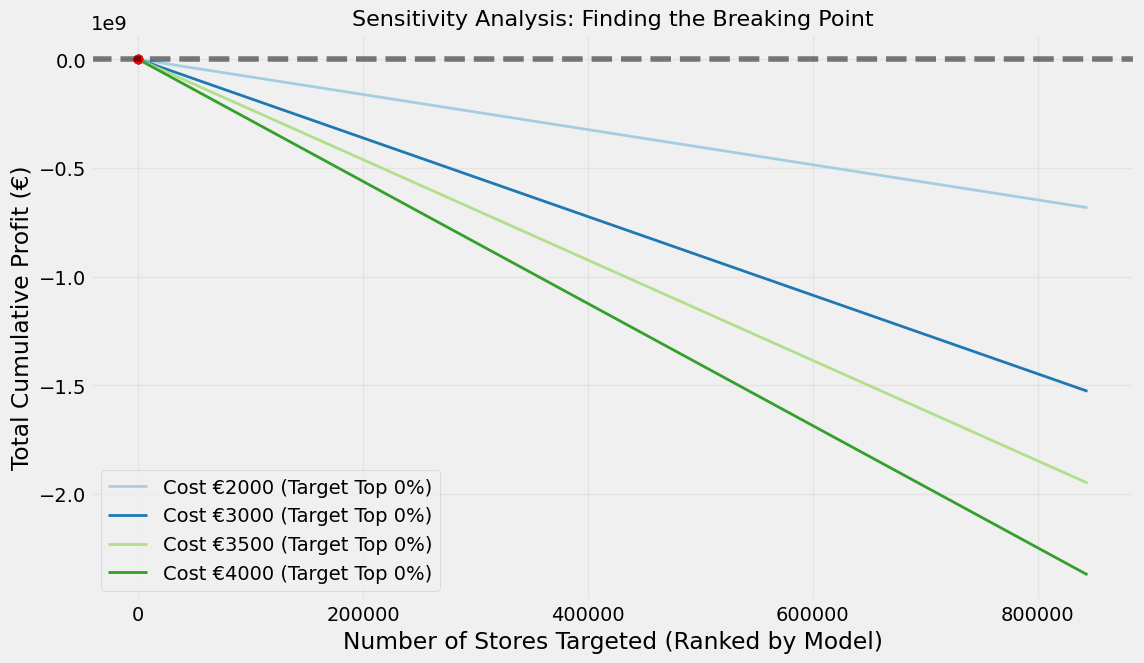

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Setup Data: Filter for valid open days only
# Ensure 'merged_df' is sorted by 'Store' and 'Date' for correct lagged features if 'ITE' depends on them
# For this analysis, we sort by 'ITE' directly to rank opportunities.
valid_analysis = merged_df[merged_df['Sales'] > 0].copy()
sorted_df = valid_analysis.sort_values('ITE', ascending=False).reset_index(drop=True)

# 2. Define "Stress Test" Costs
# We test higher costs: €2000, €3000, €3500, €4000
# This simulates "What if the promo is expensive?"
costs = [2000, 3000, 3500, 4000]

plt.figure(figsize=(12, 7))

for cost in costs:
    # Calculate Net Uplift (Lift - Cost)
    # If Lift is 3600 and Cost is 4000, Net Uplift is -400 (Loss)
    sorted_df[f'net_uplift_{cost}'] = sorted_df['ITE'] - cost

    # Cumulative Profit
    sorted_df[f'cum_profit_{cost}'] = sorted_df[f'net_uplift_{cost}'].cumsum()

    # Find the Peak (Optimal Strategy)
    optimal_idx = sorted_df[f'cum_profit_{cost}'].idxmax()
    optimal_pct = optimal_idx / len(sorted_df)

    # Plot
    plt.plot(sorted_df.index, sorted_df[f'cum_profit_{cost}'],
             label=f'Cost €{cost} (Target Top {optimal_pct:.0%})', linewidth=2)

    # Mark the peak with a red dot
    plt.plot(optimal_idx, sorted_df[f'cum_profit_{cost}'][optimal_idx], 'ro')

plt.title('Sensitivity Analysis: Finding the Breaking Point', fontsize=16)
plt.xlabel('Number of Stores Targeted (Ranked by Model)')
plt.ylabel('Total Cumulative Profit (€)')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Reasoning**:
Following the training of the T-Learner and the prediction of its ITEs (`ITE_T_Learner`), the next step is to evaluate its effectiveness. Given the previous challenges with importing `causalml`'s built-in evaluation functions, I will again use a manual uplift curve calculation, this time utilizing the `ITE_T_Learner` values instead of the S-Learner's `ITE`.

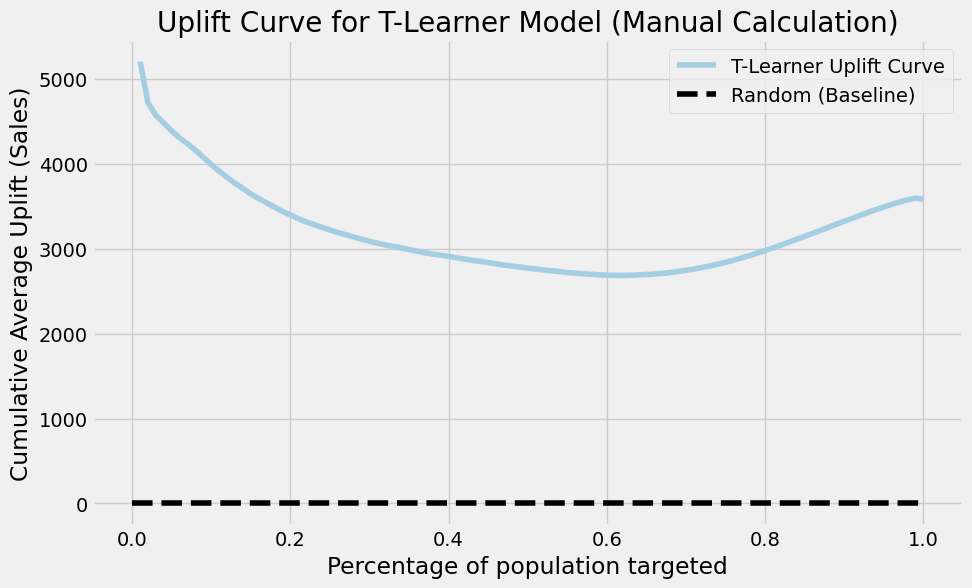

Uplift curve for T-Learner plotted successfully using manual calculation.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for uplift curve calculation using T-Learner's ITE
uplift_data_t_learner = merged_df[['Sales', 'Promo', 'ITE_T_Learner']].copy()

# Sort by ITE_T_Learner in descending order
uplift_data_t_learner = uplift_data_t_learner.sort_values(by='ITE_T_Learner', ascending=False).reset_index(drop=True)

# Initialize lists to store curve points
x_points_t_learner = [] # Percentage of population targeted
y_points_t_learner = [] # Cumulative uplift

# Calculate uplift curve manually
# Iterate through deciles (or finer quantiles) of the sorted data
for i in range(1, 101):
    subset = uplift_data_t_learner.head(int(len(uplift_data_t_learner) * i / 100))

    # Separate treated and control groups in the subset
    treated_sales = subset[subset['Promo'] == 1]['Sales']
    control_sales = subset[subset['Promo'] == 0]['Sales']

    # Calculate cumulative average sales for treated and control
    avg_treated_sales = treated_sales.mean() if not treated_sales.empty else 0
    avg_control_sales = control_sales.mean() if not control_sales.empty else 0

    # Calculate cumulative uplift (difference in average sales)
    current_uplift = avg_treated_sales - avg_control_sales

    x_points_t_learner.append(i / 100.0) # Percentage of population
    y_points_t_learner.append(current_uplift)

# Plot the uplift curve for T-Learner
plt.figure(figsize=(10, 6))
plt.plot(x_points_t_learner, y_points_t_learner, label='T-Learner Uplift Curve')
plt.plot([0, 1], [0, 0], 'k--', label='Random (Baseline)') # Baseline for random targeting (zero uplift expected on average)
plt.xlabel('Percentage of population targeted')
plt.ylabel('Cumulative Average Uplift (Sales)')
plt.title('Uplift Curve for T-Learner Model (Manual Calculation)')
plt.legend()
plt.grid(True)
plt.show()

print("Uplift curve for T-Learner plotted successfully using manual calculation.")

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df_viz' is the dataframe from your T-Learner visualization (Image 5)
# If you need to recreate it:
# df_viz = merged_df[merged_df['Open'] == 1].copy()
# df_viz['Predicted_Lift'] = df_viz['ITE_T_Learner']

# Define Segments based on T-Learner Lift
df_viz['Segment'] = pd.qcut(df_viz['Predicted_Lift'], q=3, labels=['Tier 3 (Low)', 'Tier 2 (Mid)', 'Tier 1 (High)'])

# Calculate Business Metrics per Segment
summary = df_viz.groupby('Segment', observed=False).agg({
    'Predicted_Lift': 'mean',
    'Sales': 'mean',
    'Store': 'count'
}).rename(columns={'Predicted_Lift': 'Avg Lift (€)', 'Sales': 'Base Sales (€)', 'Store': 'Store Count'})

# Add Recommendation Column
summary['Recommendation'] = [
    "STOP Promos (Cannibalization Risk)",  # Tier 3
    "Test & Learn (Seasonal Only)",        # Tier 2
    "Aggressive Push (Max ROI)"            # Tier 1
]

# Sort to show best first
summary = summary.sort_index(ascending=False)

print("=== FINAL STRATEGY RECOMMENDATION ===")
print(summary)

=== FINAL STRATEGY RECOMMENDATION ===
               Avg Lift (€)  Base Sales (€)  Store Count  \
Segment                                                    
Tier 1 (High)   2375.256301     8788.333634       281464   
Tier 2 (Mid)    1175.356525     6391.778078       281464   
Tier 3 (Low)     400.832066     5686.431160       281464   

                                   Recommendation  
Segment                                            
Tier 1 (High)           Aggressive Push (Max ROI)  
Tier 2 (Mid)         Test & Learn (Seasonal Only)  
Tier 3 (Low)   STOP Promos (Cannibalization Risk)  


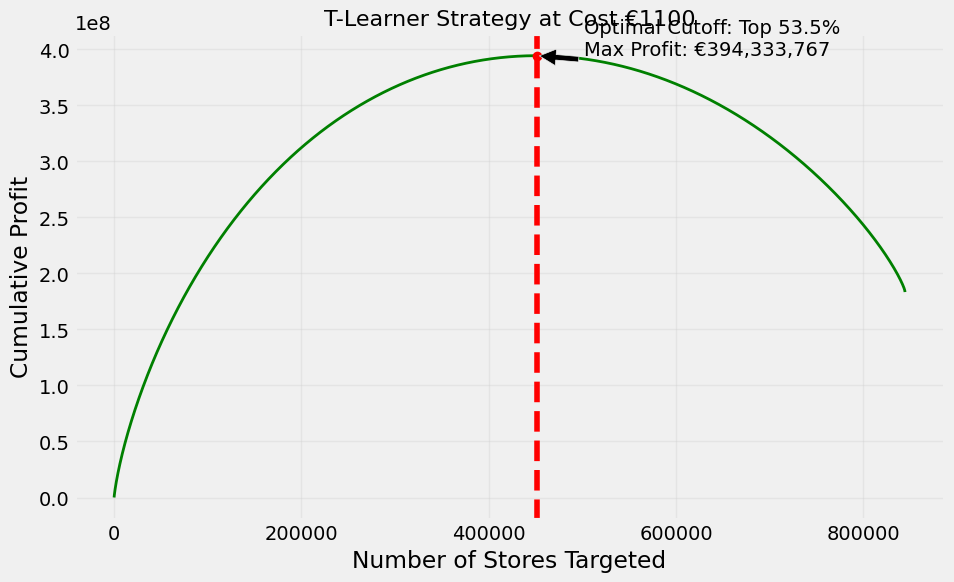

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use the T-Learner predictions we generated earlier
# predicted_lift = merged_df['ITE_T_Learner']
# If you haven't run the T-Learner code yet, use the S-Learner ITE for now but note the difference.

# 1. Setup Data
df_viz = merged_df[merged_df['Open'] == 1].copy()
df_viz['Predicted_Lift'] = df_viz['ITE_T_Learner']  # Ensure this column exists!

# Sort by Lift (Best stores first)
df_viz = df_viz.sort_values('Predicted_Lift', ascending=False).reset_index(drop=True)

# 2. The "Stress Test" (Finding the Hump)
# We choose a cost INSIDE your danger zone (€1000 - €1200)
# This is where a good model shines by finding the "profitable minority"
cost = 1100

df_viz['Net_Profit'] = df_viz['Predicted_Lift'] - cost
df_viz['Cumulative_Profit'] = df_viz['Net_Profit'].cumsum()

# 3. Plot
plt.figure(figsize=(10, 6))
plt.plot(df_viz.index, df_viz['Cumulative_Profit'], color='green', linewidth=2)

# Find Optimal Point
max_profit = df_viz['Cumulative_Profit'].max()
best_idx = df_viz['Cumulative_Profit'].idxmax()
best_pct = best_idx / len(df_viz)

# Annotate
plt.axvline(best_idx, color='red', linestyle='--')
plt.plot(best_idx, max_profit, 'ro')
plt.title(f'T-Learner Strategy at Cost €{cost}', fontsize=16)
plt.xlabel('Number of Stores Targeted')
plt.ylabel('Cumulative Profit')
plt.annotate(f"Optimal Cutoff: Top {best_pct:.1%}\nMax Profit: €{max_profit:,.0f}",
             xy=(best_idx, max_profit), xytext=(best_idx+50000, max_profit),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from causalml.inference.meta import BaseTRegressor
from xgboost import XGBRegressor

# UPGRADE: Use T-Learner with XGBoost
# XGBoost is sharper than Random Forest and handles "splits" better
# T-Learner forces the model to learn specific Promo behaviors
learner_t = BaseTRegressor(learner=XGBRegressor(n_estimators=100, max_depth=6, n_jobs=-1))

print("Training Upgraded T-Learner (XGBoost)...")
# Note: This trains TWO models (Control vs Treatment), so it takes longer but is more accurate
learner_t.fit(X, T, Y)

# Get new ITEs
ite_t = learner_t.predict(X)
merged_df['ITE_T_Learner'] = ite_t

# Check if we fixed the "Identical Value" problem
# You should now see VARIANCE in the values (e.g., 1500, 800, 200, etc.)
print(merged_df[['Promo', 'Sales', 'ITE', 'ITE_T_Learner']].head())

Training Upgraded T-Learner (XGBoost)...
   Promo  Sales          ITE  ITE_T_Learner
0      0      0  1192.040533    -156.115540
1      0   5530  1192.040533     238.174316
2      0   4327  1192.040533       2.102539
3      0   4486  1192.040533      17.375977
4      0   4997  1192.040533    -152.308594


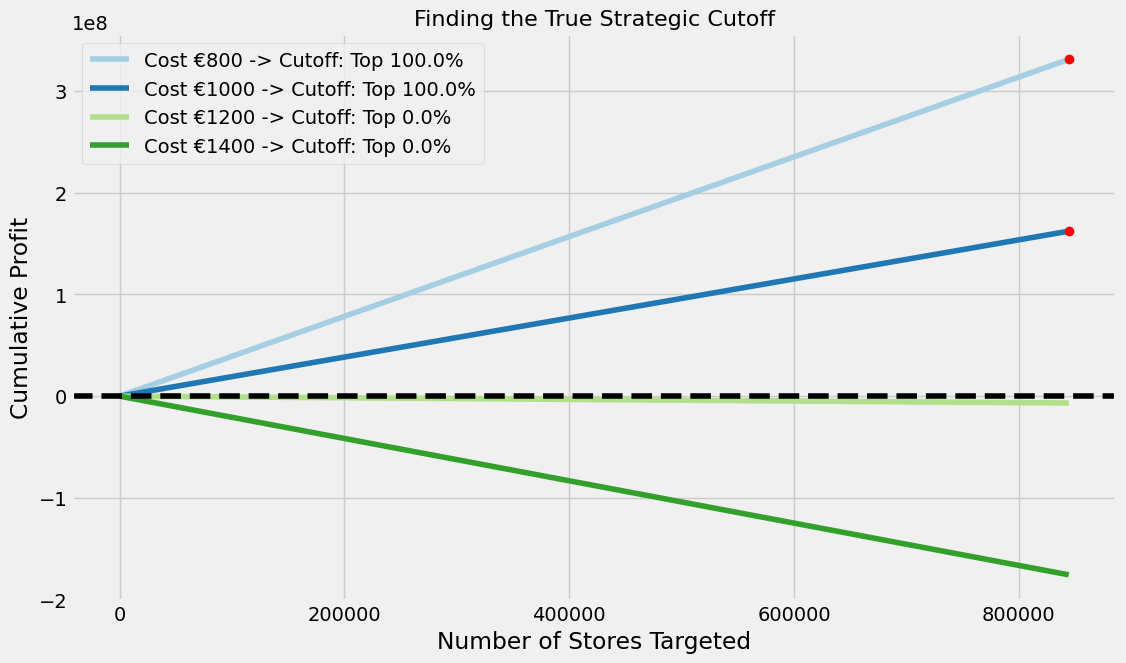

In [ ]:
import matplotlib.pyplot as plt

# 1. Filter out Closed Stores (Critical step to remove noise)
# We only want to target stores that are actually open
clean_df = merged_df[merged_df['Open'] == 1].copy()
sorted_df = clean_df.sort_values('ITE', ascending=False).reset_index(drop=True)

# 2. Test the "Sweet Spot" range
costs = [800, 1000, 1200, 1400]
plt.figure(figsize=(12, 7))

for cost in costs:
    # Calculate profit
    sorted_df[f'cum_profit_{cost}'] = (sorted_df['ITE'] - cost).cumsum()

    # Find peak
    peak_idx = sorted_df[f'cum_profit_{cost}'].idxmax()
    peak_val = sorted_df[f'cum_profit_{cost}'].max()
    peak_pct = peak_idx / len(sorted_df)

    # Plot
    plt.plot(sorted_df.index, sorted_df[f'cum_profit_{cost}'],
             label=f'Cost €{cost} -> Cutoff: Top {peak_pct:.1%}')

    # Mark peak if it exists (and is positive)
    if peak_val > 0:
        plt.plot(peak_idx, peak_val, 'ro')

plt.title('Finding the True Strategic Cutoff', fontsize=16)
plt.xlabel('Number of Stores Targeted')
plt.ylabel('Cumulative Profit')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()